# Вебинар 2. Предобработка данных.

### **Data Sceince проект:**
1. Постановка задачи
2. Получение данных
3. Анализ данных
4. Визуализация данных
5. Предобработка данных
6. Генерация новых признаков
7. Построение модели
8. Оценка качества
9. Внедрение модели
10. Мониторинг качества и улучшение модели

**Подключение библиотек и скриптов**

In [12]:
import numpy as np
import pandas as pd

**Пути к директориям и файлам**

In [8]:
DATASET_PATH = './housing.csv'
PREPARED_DATASET_PATH = './housing_prepared.csv'

### 1. Загрузка данных

**Описание задачи**

Цель - предсказать стоимость дома 

Зачем?  

_В банках, страховых компаниях:_
- Узнать истинную стоимость имущества (залога)
- Принять решение о выдаче ипотеки/страховки
- Принять решение о % по ипотеке/страховке
  
_На площадках объявлений (Авито, Циан, ...):_
- Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
- Показывать рыночную стоимость квартиры пользователям
- Для тех, кто продает квартиру, рекомендовать цену продажи

_Для инвесторов в недвижимость:_
- Определять рыночную стоимость квартир
- Поиск недооцененных активов
- Торговля на рынке недвижимости

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [3]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,6
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,7
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,8
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,9


In [4]:
df.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


In [5]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
10566,-117.76,33.71,15.0,1010.0,350.0,470.0,342.0,3.2229,108300.0,<1H OCEAN,10566


In [6]:
df.sample(frac=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
5870,-118.35,34.17,44.0,2572.0,613.0,1280.0,570.0,3.5583,232000.0,<1H OCEAN,5870
12421,-116.23,33.72,32.0,4981.0,1326.0,3779.0,1186.0,1.7805,76900.0,INLAND,12421
12106,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,103400.0,INLAND,12106
3420,-118.42,34.28,35.0,822.0,200.0,1197.0,203.0,3.2865,133300.0,<1H OCEAN,3420
14536,-117.14,32.93,16.0,2412.0,419.0,1612.0,422.0,4.5086,171100.0,<1H OCEAN,14536
...,...,...,...,...,...,...,...,...,...,...,...
6928,-118.08,34.00,35.0,1188.0,342.0,1373.0,332.0,2.9107,150900.0,<1H OCEAN,6928
15768,-122.44,37.77,52.0,2537.0,559.0,849.0,530.0,5.1788,476900.0,NEAR BAY,15768
18308,-122.11,37.41,35.0,2712.0,428.0,1084.0,425.0,7.1382,443800.0,NEAR BAY,18308
4530,-118.22,34.04,43.0,2343.0,803.0,2468.0,707.0,1.5163,115000.0,<1H OCEAN,4530


In [7]:
df.shape

(20640, 11)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [ ]:
df['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [11]:
df.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [9]:
df[['total_rooms', 'total_bedrooms']]

,total_rooms,total_bedrooms
0,880.0,129.0
1,7099.0,1106.0
2,1467.0,190.0
3,1274.0,235.0
4,1627.0,280.0
...,...,...
20635,1665.0,374.0
20636,697.0,150.0
20637,2254.0,485.0
20638,1860.0,409.0


In [10]:
df['population'] > 400

0        False
1         True
2         True
3         True
4         True
         ...  
20635     True
20636    False
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [13]:
df[df['population'] > 400].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [ ]:
df[(df['population'] > 100) & (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df[(df['population'] > 100) | (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df[~(df['population'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
df.loc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
id                           0
Name: 0, dtype: object

In [ ]:
df.iloc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
id                           0
Name: 0, dtype: object

In [9]:
df.loc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [ ]:
df.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df.iloc[-6:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND,20634
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


### 2. Приведение типов данных

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [ ]:
type(df.longitude)

pandas.core.series.Series

In [ ]:
df['id'].dtype

dtype('int64')

In [ ]:
df['id'].values

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [ ]:
type(df['id'].values)

numpy.ndarray

In [ ]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

### Обзор количественных переменных

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


статистика

In [5]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [6]:
mean = a.sum() / len(a)
mean

3.0

In [ ]:
variance = ((a - mean) ** 2).sum() / len(a)
std = np.sqrt(variance)
variance, std

(2.0, 1.4142135623730951)

In [8]:
mean_np = np.mean(a)
mean_np

3.0

In [9]:
std_np = np.std(a)
std_np

1.4142135623730951

In [28]:
a = [3, 4, 5, 6, 1, 2, 2, 6]
a = np.sort(a)
a

array([1, 2, 2, 3, 4, 5, 6, 6])

In [29]:
len(a)

8

In [30]:
np.quantile(a, 0.5)

3.5

In [31]:
np.median(a)

3.5

In [32]:
np.quantile(a, q=0.25)

2.0

In [33]:
np.quantile(a, q=0.75)

5.25

In [38]:
np.quantile(df['total_rooms'], q=0.5)

2127.0

In [40]:
np.quantile(df['total_rooms'], q=0.25)

1447.75

In [39]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

### Обзор номинативных переменных

In [ ]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity,id
0,NEAR BAY,0
1,NEAR BAY,1
2,NEAR BAY,2
3,NEAR BAY,3
4,NEAR BAY,4


In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

6

### 3. Обработка пропусков

In [41]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,True,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [42]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

In [ ]:
median = df['housing_median_age'].median()
df['housing_median_age'].fillna(median, inplace=True)

**total_bedrooms**

In [ ]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

**population**

In [ ]:
median = df['population'].median()
df['population'].fillna(median, inplace=True)

**все вместе**

In [ ]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [ ]:
df[['housing_median_age', 'total_bedrooms', 'population']] = df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
id                    0
dtype: int64

**ocean_proximity**

In [ ]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [ ]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [44]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

In [45]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

### 4. Обработка выбросов

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,10319.500000
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,5958.399114
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,5159.750000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,15479.250000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


Возможные значения longtitude (долгота) и latitude (широта) можно найти [здесь](https://dateandtime.info/ru/citycoordinates.php?id=5332748)



_Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W)._

Калифорнии находится в западном и северном полушарии.


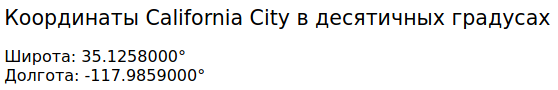

**longitude**

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423


In [ ]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [ ]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [ ]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

**latitude**

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772


In [ ]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

### 5. Отбор и построение новых признаков

**Исключаем признак "id"**

In [ ]:
df = df[df.columns[:-1]]

**Количественные переменные**

In [ ]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

**Категориальные переменные**

Неплохой обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

**A) Бинарные (дамми) переменные**

In [ ]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445840,0.437991,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209588,0.347265,0,0,0,1,0


**Б) Feature encoding**

описание категории каким-то числом

In [ ]:
df_cat = df.groupby('ocean_proximity').median()['total_rooms']
df_cat = pd.DataFrame(df_cat)

df_cat

,total_rooms
ocean_proximity,
<1H OCEAN,2108.0
INLAND,2130.0
ISLAND,1675.0
NEAR BAY,2083.0
NEAR OCEAN,2197.0


In [ ]:
df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_rooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_rooms
0,<1H OCEAN,2108.0
1,INLAND,2130.0
2,ISLAND,1675.0
3,NEAR BAY,2083.0
4,NEAR OCEAN,2197.0


In [ ]:
df_cat.rename(columns={'total_rooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

,ocean_proximity,median_rooms
2,ISLAND,1675.0
3,NEAR BAY,2083.0
0,<1H OCEAN,2108.0
1,INLAND,2130.0
4,NEAR OCEAN,2197.0


In [ ]:
df['total_rooms'].median()

2127.0

In [ ]:
df = df.merge(df_cat, on='ocean_proximity')

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0,2083.0


### latitude, longitude:

_Идея №1_

[Источник](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a)

                   

In [13]:
!pip install reverse_geocoder

    100% |████████████████████████████████| 2.3MB 317kB/s ta 0:00:01
  Stored in directory: /home/julia/.cache/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


In [47]:
import reverse_geocoder as revgc  

revgc.search((df.iloc[10].latitude, df.iloc[10].longitude))   

Loading formatted geocoded file...


[OrderedDict([('lat', '37.87159'),
              ('lon', '-122.27275'),
              ('name', 'Berkeley'),
              ('admin1', 'California'),
              ('admin2', 'Alameda County'),
              ('cc', 'US')])]

_Идея №2_

- Найти координаты центров городов, достопримечательностей, станций метро, ..
- Считать расстояние до <...>
- Количество <...> в радиусе 3 км
- ...

Описание методов можно посмотреть [здесь](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)

- [Feature discretization](https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2)

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет), 2 категория - дома от 5 до 10

- [Feature binarization](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)

только 2 признака

1 - новый дом, 0 - старый

### 6. Сохранение результатов

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

### 7. Подготовка данных в реальном проекте

In [ ]:
import numpy as np
import pandas as pd

In [50]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
        
        
        # 2. Выбросы (outliers)
        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median
        
        
        # 3. Новые фичи (features)
        
        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']
        
        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
        
        return df


In [51]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

In [52]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [53]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0


In [54]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
id                     0
bedroom_share          0
population_per_room    0
-                      0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64